In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from scipy.stats import entropy
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

In [74]:
from sklearn import datasets
data = datasets.load_iris()

In [75]:
#Sprawdz liczbe wszysktich przypadków
print(data.data.shape[0])
print(data.feature_names)
print(data.data[:5])

150
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


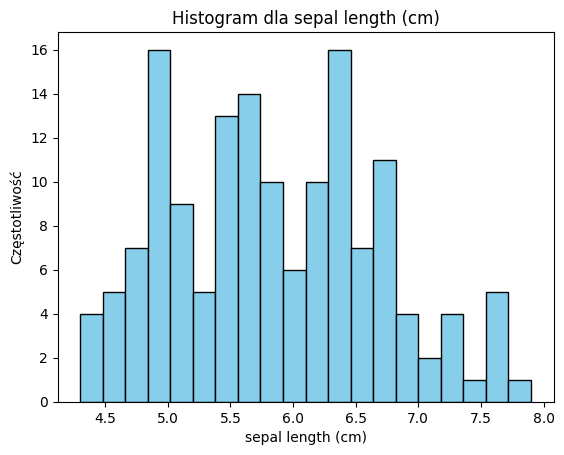

In [76]:
column_data = data.data[:, 0]

# Narysuj histogram
plt.hist(column_data, bins=20, color='skyblue', edgecolor='black')
plt.xlabel(data.feature_names[0])
plt.ylabel('Częstotliwość')
plt.title('Histogram dla sepal length (cm)')
plt.show()

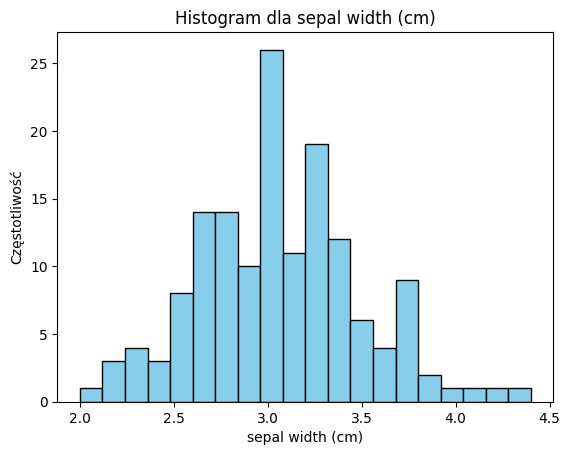

In [77]:
column_data = data.data[:, 1]

# Narysuj histogram
plt.hist(column_data, bins=20, color='skyblue', edgecolor='black')
plt.xlabel(data.feature_names[1])
plt.ylabel('Częstotliwość')
plt.title('Histogram dla sepal width (cm)')
plt.show()

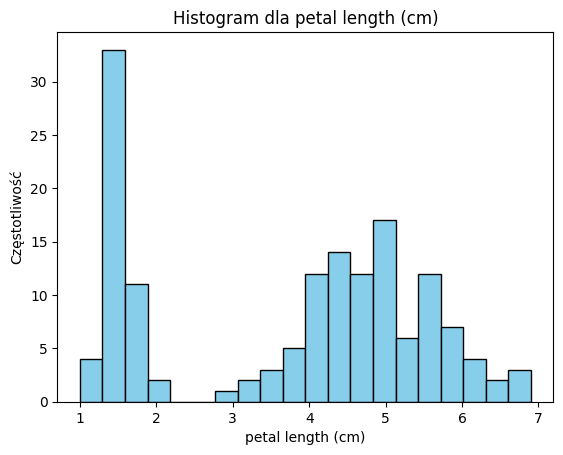

In [78]:
column_data = data.data[:, 2]

# Narysuj histogram
plt.hist(column_data, bins=20, color='skyblue', edgecolor='black')
plt.xlabel(data.feature_names[2])
plt.ylabel('Częstotliwość')
plt.title('Histogram dla petal length (cm)')
plt.show()

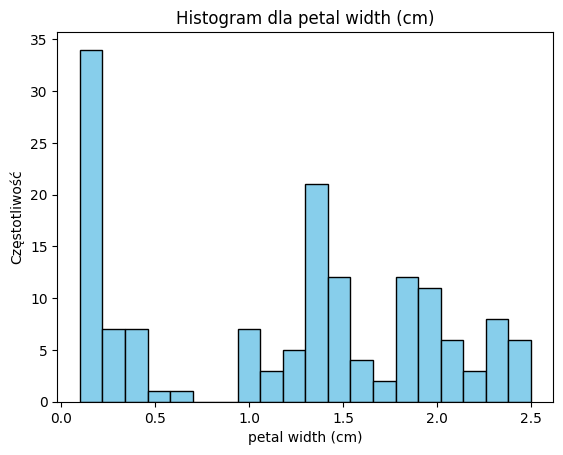

In [79]:
column_data = data.data[:, 3]

# Narysuj histogram
plt.hist(column_data, bins=20, color='skyblue', edgecolor='black')
plt.xlabel(data.feature_names[3])
plt.ylabel('Częstotliwość')
plt.title('Histogram dla petal width (cm)')
plt.show()

In [88]:
X, y = data.data, data.target

#Obliczenia zysku informacyjnego
#a) PetalWidthCm na poziomie 0.5
selected_indices_05 = (X[:, 3] >= 0.5)     
selected_indices_038 = (X[:, 3] >= 0.38)        
                              
class_counts = [0, 0, 0] 
for i in range(3):  
    class_counts[i] = sum(y[selected_indices_05] == i) 

print("Liczba wystąpień każdej kategorii z cechą 2 na poziomie wyższym niż 0.5:")
print("Iris-setosa:", class_counts[0])
print("Iris-versicolor:", class_counts[1])
print("Iris-virginica:", class_counts[2])

#Entropia na start: 1
#Entropia po podziale po 0.5: (0.72+0,33)/2 = 1.05/2 = 0.525
#Zysk informacyjny
print(f"Zysk informacyjny: {1 - 0.525:.3f}")

class_counts = [0, 0, 0] 
for i in range(3):  
    class_counts[i] = sum(y[selected_indices_038] == i) 

print("Liczba wystąpień każdej kategorii z cechą 2 na poziomie wyższym niż 0.5:")
print("Iris-setosa:", class_counts[0])
print("Iris-versicolor:", class_counts[1])
print("Iris-virginica:", class_counts[2])

#Entropia po podziale po 0.38: (0.82+0,33)/2 = 1.15/2 = 0.575
print(f"Zysk informacyjny: {1 - 0.575:.3f}")


#tu entropia liczona przy pomocy Pythona, roznica wynika z ważenia średniej
selected_indices = X[:, 3] >= 0.5
selected_y = y[selected_indices]

# Oblicz liczbę wystąpień każdej klasy w wybranych próbkach
class_counts = np.bincount(selected_y)

# Oblicz prawdopodobieństwo wystąpienia każdej klasy
class_probabilities = class_counts / len(selected_y)

# Oblicz entropię
entropy_value = entropy(class_probabilities, base=3)

print(entropy_value)

Liczba wystąpień każdej kategorii z cechą 2 na poziomie wyższym niż 0.5:
Iris-setosa: 2
Iris-versicolor: 50
Iris-virginica: 50
Zysk informacyjny: 0.475
Liczba wystąpień każdej kategorii z cechą 2 na poziomie wyższym niż 0.5:
Iris-setosa: 9
Iris-versicolor: 50
Iris-virginica: 50
Zysk informacyjny: 0.425
0.7064048237156498


In [89]:
X, y = data.data, data.target
print("Liczba unikalnych klas:", len(np.unique(y)))

Liczba unikalnych klas: 3


In [113]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

params = {'criterion': ('gini', 'entropy'),
          'max_depth': [2, 3, 4]}

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [116]:
tree.plot_tree(clf)

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4]}) instead.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=15, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


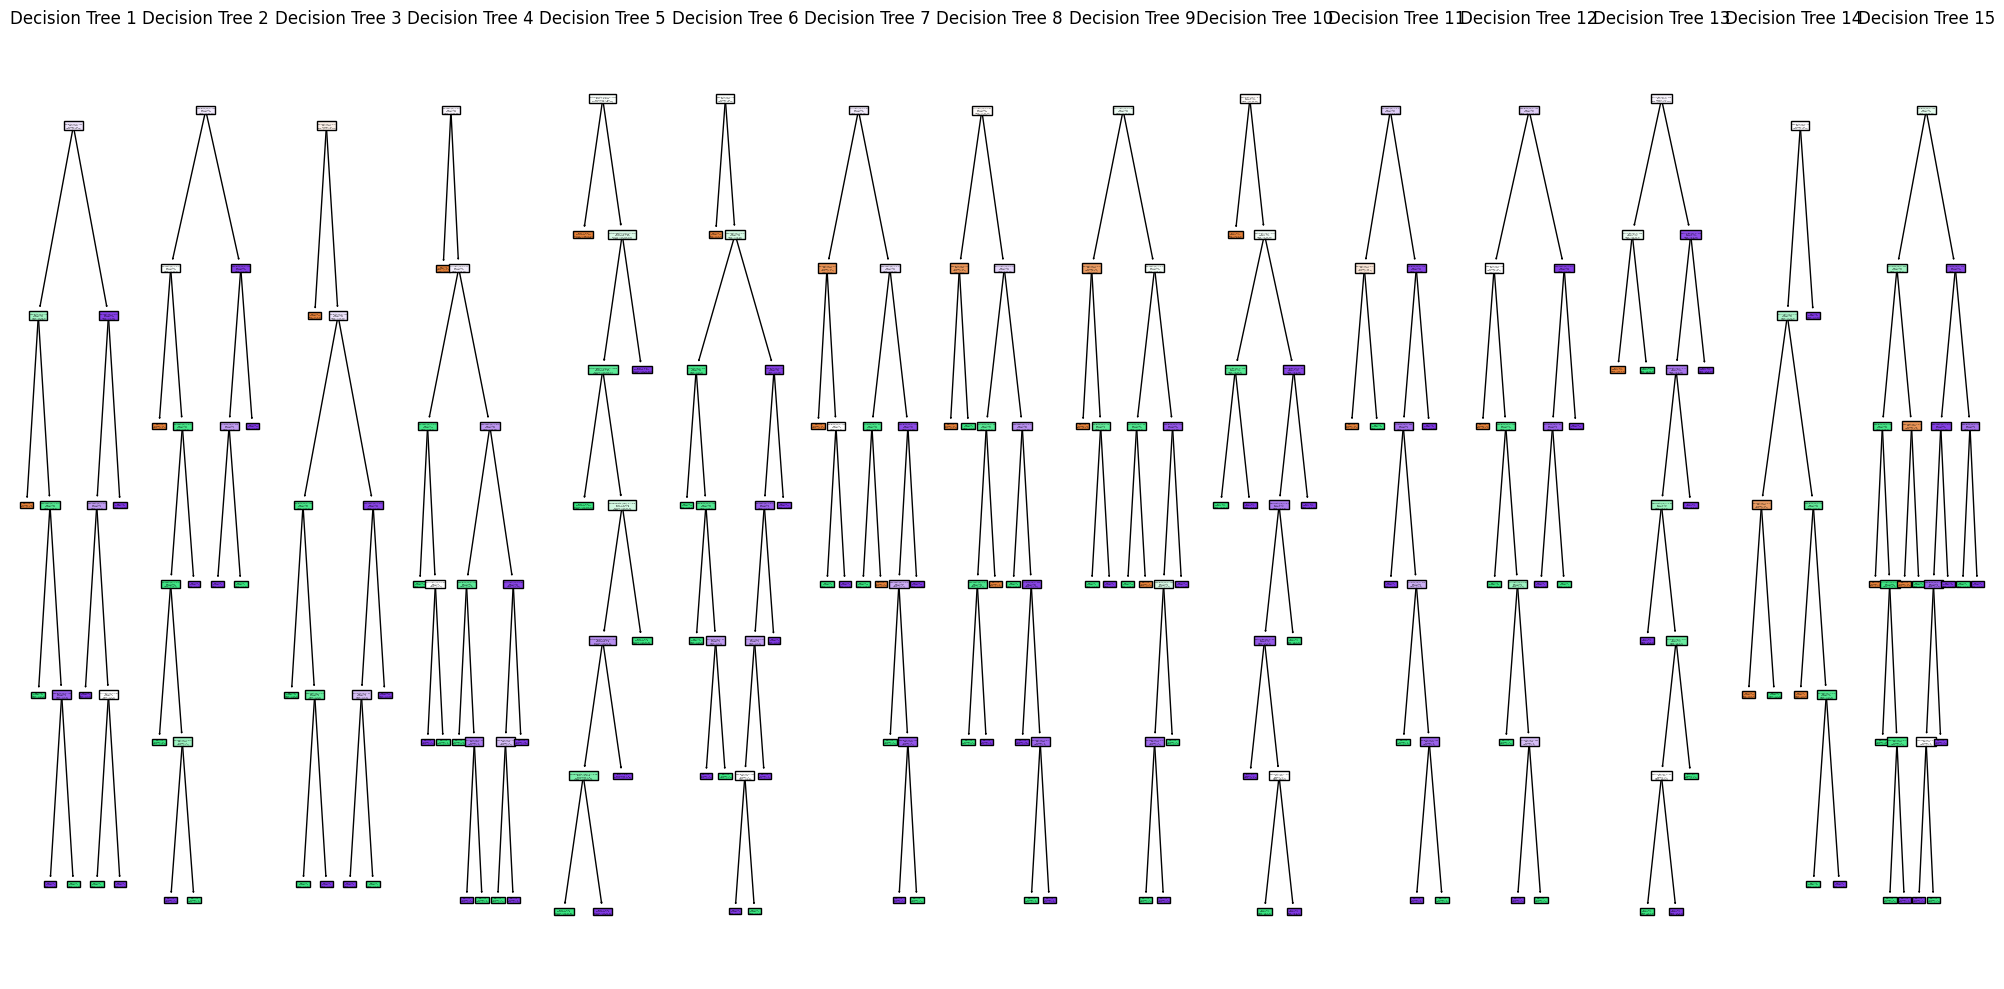

In [84]:
# Plot each decision tree in the forest
plt.figure(figsize=(20, 10))
for i in range(len(rf.estimators_)):
    plt.subplot(1, len(rf.estimators_), i + 1)
    plot_tree(rf.estimators_[i], feature_names=data.feature_names, class_names=data.target_names, filled=True)
    plt.title(f'Decision Tree {i+1}')

plt.tight_layout()
plt.show()

In [85]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [86]:
# evaluate model
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.630 (0.100)


In [87]:
# evaluate model
scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.740 (0.120)


In [134]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

params = {'criterion': ('gini', 'entropy'),
          'max_depth': [2, 3, 4]}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=clf, param_grid=params, cv=5)

grid_search = grid_search.fit(X_train,y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

y_pred = grid_search.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3}
Best Score: 0.9333333333333333
Accuracy: 1.0


In [136]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
}

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf, param_distributions=params, n_iter=10, cv=5, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Make predictions
y_pred = random_search.predict(X_test)

# Print accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Best Hyperparameters: {'max_depth': 3, 'criterion': 'gini'}
Best Score: 0.9333333333333333
Accuracy: 1.0


C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [140]:
params = {'criterion': ('gini', 'entropy'),
          'max_depth': [2, 3, 4, 5],
          'n_estimators' : range(2, 81)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5)

grid_search = grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Hyperparameters:", best_score)

y_pred = grid_search.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 35}
Best Hyperparameters: 0.9523809523809523
Accuracy: 1.0


In [139]:
params = {'criterion': ('gini', 'entropy'),
          'max_depth': [2, 3, 4, 5],
          'n_estimators' : range(2, 81)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)

randomized_search = RandomizedSearchCV(estimator=rf, param_distributions=params, cv=5)

randomized_search = randomized_search.fit(X_train, y_train)

best_params = randomized_search.best_params_
best_score = randomized_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

y_pred = randomized_search.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters: {'n_estimators': 31, 'max_depth': 4, 'criterion': 'entropy'}
Best Score: 0.9428571428571428
Accuracy: 1.0
